In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Центральная предельная теорема своими руками

### Для примера возьмём трапецивидное распределение, при котором плотность выглядит, как трапеция с нижним основанием от 0 до 1, а с верхним — от точки c=0.4 до точки d=1

In [2]:
c = 0.4
d = 1.0

### В нашем случае параметры следующие:

Высоту трапеции $h$ определяем из условия нормировки $\int_0^1 f(x)dx = 1$, отсюда $\frac{1}{2}*h*0.4 + h*0.6 =1$, $h=1.25$
Коэффициент наклона $a$ для линейно растущей части плотности определяем из $a*0.4=1.25$, a=3.125

### Строим гистограмму по выборке r из 1000 элементов и также теоретическую плотность распределения

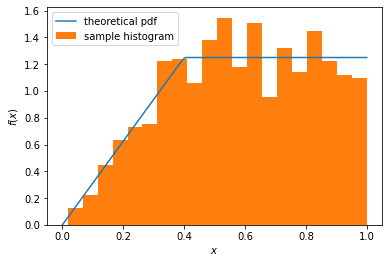

In [3]:
x = np.linspace(0,1,100)
r = sts.trapz.rvs(c, d, size=1000)
pdf = sts.trapz.pdf(x, c, d)
plt.plot(x, pdf, label='theoretical pdf', alpha=5.0)
plt.hist(r, bins=20,density=True, label='sample histogram')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')
plt.show()

#### Действительно вышло похоже на трапецию

### Записываем дисперсию и мат.ожидание нашей случайной величины (предварительно посчитаны на бумажке):

 $M[x]=\frac{x^3}{3}*a\bigg|_0^{0.4}+\frac{x^2}{2}*h\bigg|_{0.4}^1$

 $M[x^2]=\frac{x^4}{4}*a\bigg|_0^{0.4}+\frac{x^3}{3}*h\bigg|_{0.4}^1$

 $D[x] = M[x^2] - \left( M[x] \right)^2$

In [4]:
m = 0.591666667
disp = 0.059930556

### Берём выборки по 5,15 и 50 элементов и считаем для 1000 из каждых таких выборок выборочное среднее

In [5]:
samp_5, samp_15,samp_50 = [],[],[]
for i in range(1000):
    r_5 = sts.trapz.rvs(c, d, size=5)
    r_15 = sts.trapz.rvs(c, d, size=15)
    r_50 = sts.trapz.rvs(c, d, size=50)
    samp_5.append(np.mean(r_5,axis=0))
    samp_15.append(np.mean(r_15,axis=0))
    samp_50.append(np.mean(r_50,axis=0))

### Строим полученные гистограммы и сравниваем их с предсказаниями ЦПТ

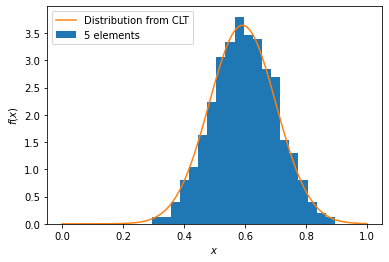

In [6]:
plt.hist(samp_5, bins=20,density=True,label='5 elements')
pdf = sts.norm.pdf(x, m, math.sqrt(disp/5.0))
plt.plot(x, pdf, label='Distribution from CLT', alpha=5.0)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')
plt.show()

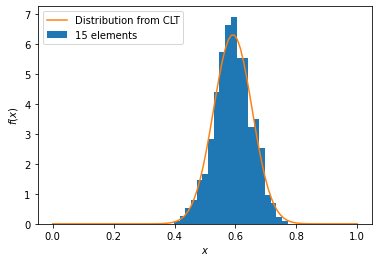

In [7]:
plt.hist(samp_15, bins=20,density=True,label='15 elements')
pdf = sts.norm.pdf(x, m, math.sqrt(disp/15.0))
plt.plot(x, pdf, label='Distribution from CLT', alpha=5.0)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')
plt.show()

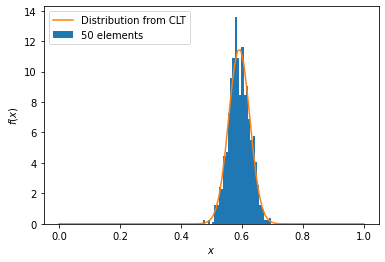

In [8]:
plt.hist(samp_50, bins=30,density=True,label='50 elements')
pdf = sts.norm.pdf(x, m, math.sqrt(disp/50.0))
plt.plot(x, pdf, label='Distribution from CLT', alpha=5.0)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')
plt.show()

### Строим все три распределения вместе и видим, что в силу уменьшения дисперсии из-за роста размера выборки выборочные средние становятся всё менее разбросанными относительно действительного матожидания распределения 

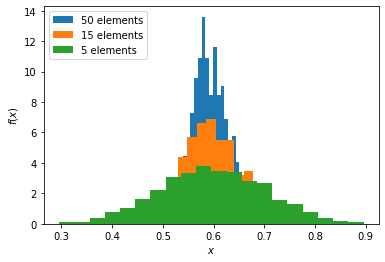

In [9]:
plt.hist(samp_50, bins=30,density=True,label='50 elements')
plt.hist(samp_15, bins=20,density=True,label='15 elements')
plt.hist(samp_5, bins=20,density=True,label='5 elements')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')
plt.show()